In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.utils import check_random_state

# data loading
train_samples = 500
X ,y = fetch_openml("mnist_784", version = 1 , return_X_y = True , as_frame = False )
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0],-1))
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_samples, test_size = 100)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


In [69]:
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# Define the logistic regression estimator
logistic = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')

# Create a pipeline with scaling and the estimator
pipeline = Pipeline([("scaler", scaler), ("logistic", logistic)])

# Parameters of pipelines
param_grid = {
    "logistic__C": np.logspace(-2, 2, 9),
}

In [73]:
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5,  n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Extract the results of the grid search
results = grid_search.cv_results_

# Get the values of hyperparameter C from the parameter grid
C_values = param_grid['logistic__C']

best_params = grid_search.best_params_
print('Best parameter:', best_params)

Best parameter: {'logistic__C': 0.31622776601683794}


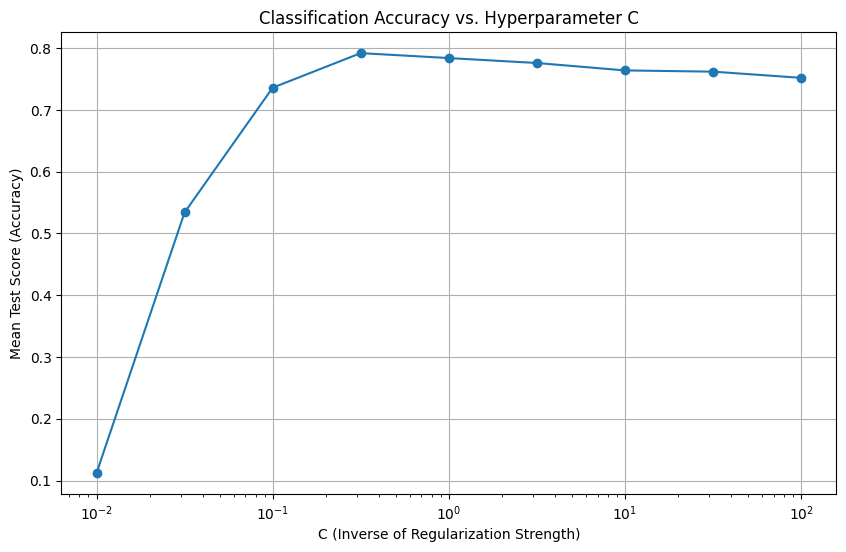

[1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02]


In [71]:
# Plot the classification accuracy vs. C values
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, results['mean_test_score'], marker='o')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Classification Accuracy vs. Hyperparameter C')
plt.grid(True)
plt.show()

print(C_values)

In [72]:
# Predict on the test data
y_pred = grid_search.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))

Confusion Matrix:
[[12  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  1  8  0  0  0  0  0  0  0]
 [ 0  1  1 12  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  1]
 [ 2  1  0  1  0  3  0  0  2  0]
 [ 0  1  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  1]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  1  0  0  1  0  4]]

Precision: 0.8775
Recall: 0.8600
F1-Score: 0.8494
